# Solución del Punto 6 del Laboratorio 1

En las siguientes celdas se implemetatrá el coidigo de ** *`InsertionSort`,* ** para ordenar las permutaciones de tamaño **n**, y de la solución .

**Notas:**
1. El codigo de InsertionSort fue implementado tal y como está definido en el libro de Cormen....   
2. Las permutaciones de generan, tal como se pide:    
    2.1 Usando la libreria **`itertools`**     
    2.2 Usando el código de **`Daniel Jimenez`** (en java) pero implementado en Python  
    2.3 Usando un **`número aleatorio`** de permutaciones



Librerias que se usaran en la solución: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math 


## InsertionSort()

In [2]:
def InsertionSort( A ):

	comparison = 0 #
	exchange = 0 # cuenta el numero de intercambios, por lo menos 1 por cada numero
	instruction = 0 # cuenta el numero de instrucciones que realiza este algoritmo para cada arreglo de numeros

	for j in range( 1, len( A ) ):
		key = A[ j ]
		i = j - 1
		instruction += 4
		comparison += 2
		while i >= 0 and A[ i ] > key  :
			A [ i + 1 ] = A [ i ]
			i -= 1
			comparison += 2
			exchange += 1
			instruction += 2
		A[ i + 1 ] = key
		exchange += 1
		instruction += 1

	return [ A, comparison, exchange, instruction ]

La siguiente función se usa para calcular el promedio de los elementos de uan lista de enteros, que se usará para pintar las gráficas 

In [3]:
def promediarLista(lista):
	sum = 0
	for i in range(0, len(lista)):
		sum = sum + lista[i]

	return   sum / len( lista )

## 2.1  *itertools*:



In [4]:
listComparisonGlobal = [ ]
listExchangeGlobal = [ ]
listInstructionGlobal = [ ]

# with itertools

for i in range( 1, 12 ):
	z = i #tamano de la permutacion
	listComparison = [ ]
	listExchange = [ ]
	listInstruction = [ ]

	for x in itertools.permutations( range( z ), z ) :
		y = list ( x ) # each element x is the type 'tuple' THEN inmutable
		final = InsertionSort( y )
		#print final
		listComparison.append( final[ 1 ] )
		listExchange.append( final[ 2 ] )
		listInstruction.append( final[ 3 ] )


	listComparisonGlobal.append( promediarLista( listComparison ) )
	listExchangeGlobal.append( promediarLista( listExchange ) )
	listInstructionGlobal.append( promediarLista( listInstruction ) )



## Graficando los resultados: 

### 2.1.1 Promedio de instrucciones 

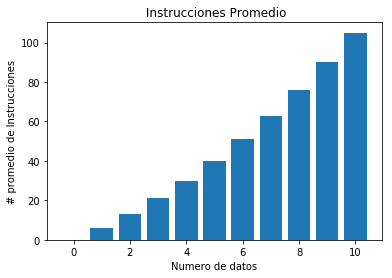

In [5]:
sizeArray = range ( 11 ) # lista del 0 to 11 
casoPromedio = listInstructionGlobal

fig = plt.figure()
axes = fig.add_subplot( 111 )
plt.bar( sizeArray, casoPromedio )
plt.ylabel('# promedio de Instrucciones' )
plt.xlabel('Numero de datos')
plt.title( " Instrucciones Promedio" )
plt.show()

### 2.1.2 Promedio de comparaciones

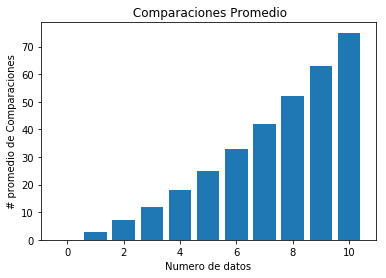

In [6]:
casoPromedio = listComparisonGlobal

fig = plt.figure()
axes = fig.add_subplot( 111 )
plt.bar( sizeArray, casoPromedio )
plt.ylabel('# promedio de Comparaciones' )
plt.xlabel('Numero de datos')
plt.title( " Comparaciones Promedio" )
plt.show()

### 2.1.3 Promedio de Intercambios

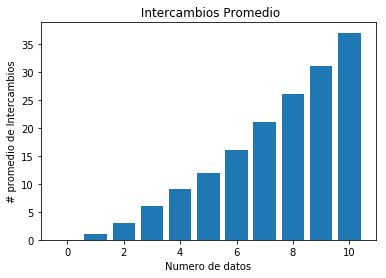

In [ ]:
casoPromedio = listExchangeGlobal

fig = plt.figure()
axes = fig.add_subplot( 111 )
plt.bar( sizeArray, casoPromedio )
plt.ylabel('# promedio de Intercambios' )
plt.xlabel('Numero de datos')
plt.title( " Intercambios Promedio" )
plt.show()

## 2.2 Daniel Jimenez code 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import itertools

def InsertionSort( A ):

	comparison = 0 #
	exchange = 0 # cuenta el numero de intercambios, por lo menos 1 por cada numero
	instruction = 0 # cuenta el numero de instrucciones que realiza este algoritmo para cada arreglo de numeros

	for j in range( 1, len( A ) ):
		key = A[ j ]
		i = j - 1
		instruction += 4
		comparison += 2
		while i >= 0 and A[ i ] > key  :
			A [ i + 1 ] = A [ i ]
			i -= 1
			comparison += 2
			exchange += 1
			instruction += 2
		A[ i + 1 ] = key
		exchange += 1
		instruction += 1

	return [ instruction, comparison, exchange  ]


def promediarLista( lista ):
	sum = 0
	for i in range( 0, len( lista ) ):
		sum = sum + lista[ i ]

	return   sum / len( lista )


def swap ( v, i, j ):
    t = v[ i ]
    v[ i ] = v[ j ]
    v[ j ] = t

	
def perm(v, i, n):
	GlobalList = [ ]
	cases, j = 0, 0

	if i == n:
		listAux = [ ]
		cases += 1
		for j in range( 0, n ):
			listAux.append( v[ j ] )
		# print  listAux #esta es la permutacion
		GlobalList.extend( InsertionSort( listAux ) )
		InstructionProm.append( GlobalList[ 0 ] )
		ComparisonProm.append( GlobalList[ 1 ] )
		ExchengeProm.append( GlobalList[ 2 ] )

	else:
		for j in range( i, n ):
			swap( v, i, j )
			perm( v, i + 1, n )
			swap( v, i, j )

numInstructionProm = [ ]
numComparisonProm = [ ]
numExchegeProm = [ ]

for k in range ( 1,12 ):
	InstructionProm = [ ]
	ComparisonProm = [ ]
	ExchengeProm = [ ]

	myList = range( k )
	list1 = perm ( myList, 0, k )
	
	numInstructionProm.append( promediarLista( InstructionProm ) )
	numComparisonProm.append( promediarLista( ComparisonProm ) )
	numExchegeProm.append( promediarLista( ExchengeProm ) )
#print "InsProm", numInstructionProm
#print "ComProm", numComparisonProm
#print "ExgProm", numExchegeProm



## Graficando los resultados: 

### 2.2.1 Promedio de instrucciones 

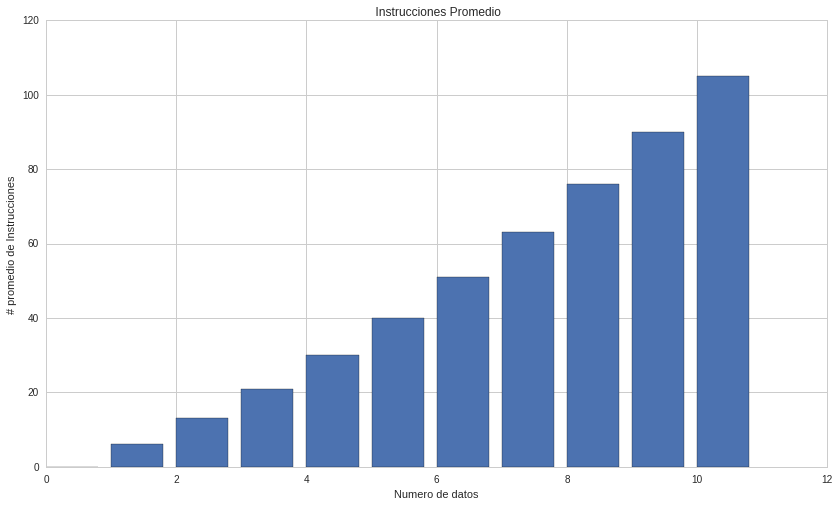

In [2]:
sizeArray = range (11)

casoPromedio = numInstructionProm

fig = plt.figure()
axes = fig.add_subplot( 111 )
plt.bar( sizeArray, casoPromedio )
plt.ylabel('# promedio de Instrucciones' )
plt.xlabel('Numero de datos')
plt.title( " Instrucciones Promedio" )
plt.show()

### 2.2.2 Promedio de comparaciones

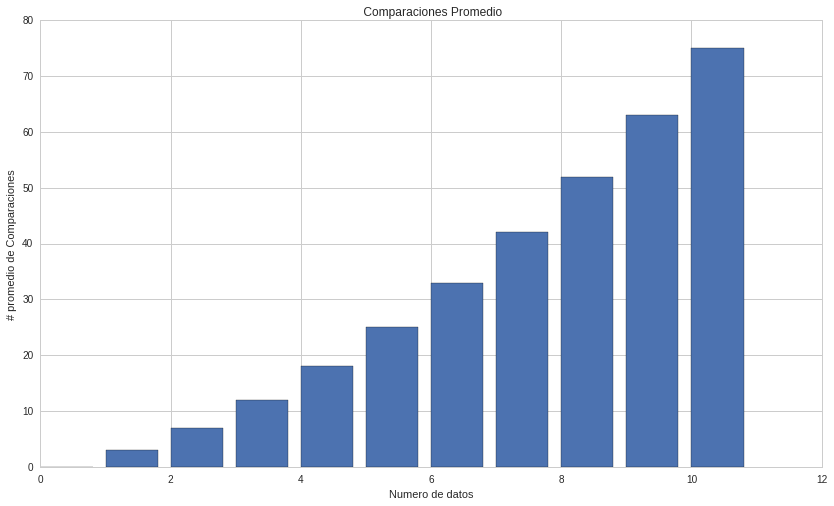

In [3]:
casoPromedio = numComparisonProm

fig = plt.figure()
axes = fig.add_subplot( 111 )
plt.bar( sizeArray, casoPromedio )
plt.ylabel('# promedio de Comparaciones' )
plt.xlabel('Numero de datos')
plt.title( " Comparaciones Promedio" )
plt.show()


### 2.2.3 Promedio de Intercambios

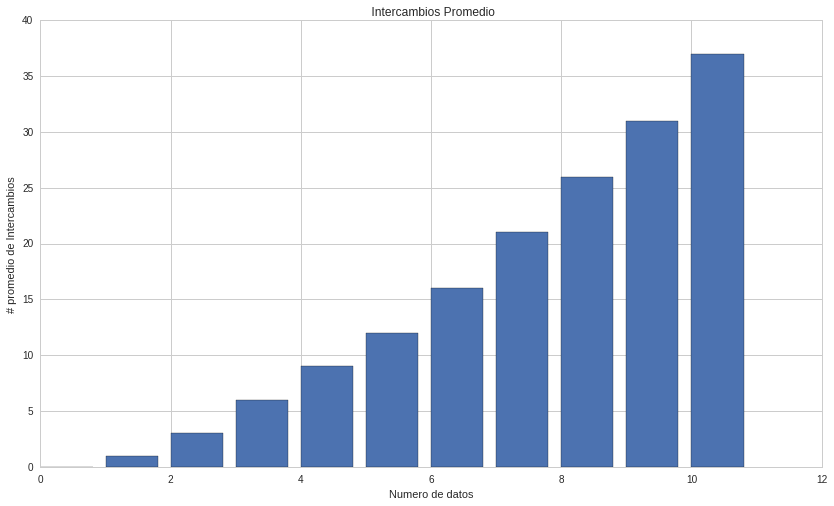

In [ ]:
casoPromedio = numExchegeProm

fig = plt.figure()
axes = fig.add_subplot( 111 )
plt.bar( sizeArray, casoPromedio )
plt.ylabel('# promedio de Intercambios' )
plt.xlabel('Numero de datos')
plt.title( " Intercambios Promedio" )
plt.show()

## 2.3 Número aleatorio de permutaciones

In [1]:
  # -*- coding: utf-8 -*-
"""
Created on Sat Mar 24 18:18:15 2018

@author: USER
"""

import matplotlib.pyplot as plt
import itertools
from random import randint
import math 

def InsertionSort( A ):

	comparison = 0 #
	exchange = 0 # cuenta el numero de intercambios, por lo menos 1 por cada numero
	instruction = 0 # cuenta el numero de instrucciones que realiza este algoritmo para cada arreglo de numeros

	for j in range( 1, len( A ) ):
		key = A[ j ]
		i = j - 1
		instruction += 4
		comparison += 2
		while i >= 0 and A[ i ] > key  :
			A [ i + 1 ] = A [ i ]
			i -= 1
			comparison += 2
			exchange += 1
			instruction += 2
		A[ i + 1 ] = key
		exchange += 1
		instruction += 1

	return [ A, comparison, exchange, instruction ]

def promediarLista(lista):
	sum = 0
	for i in range(0, len(lista)):
		sum = sum + lista[i]

	return   sum / len( lista )


# --------------here begings----------------------

listComparisonGlobal = [ ]
listExchangeGlobal = [ ]
listInstructionGlobal = [ ]

# with itertools
n = 12 
for i in range( 1, n ): #para cada permutacion de tamaño n 
	z = i #tamano de la permutacion
	listComparison = [ ]
	listExchange = [ ]
	listInstruction = [ ]
	
	factorialN = math.factorial( i )
	random1 = randint( 1, factorialN )

	m = list( itertools.permutations( range( z ), z ) ) 

	for x in range ( 0, random1  ) :

		random2 = randint( 0, factorialN )
		y = list ( list( m[ random2 - 1 ] ) ) # each element x is the type 'tuple' THEN inmutable
		final = InsertionSort( y )

		listComparison.append( final[ 1 ] )
		listExchange.append( final[ 2 ] )
		listInstruction.append( final[ 3 ] )

	listComparisonGlobal.append( promediarLista( listComparison ) )
	listExchangeGlobal.append( promediarLista( listExchange ) )
	listInstructionGlobal.append( promediarLista( listInstruction ) )



## Graficando los resultados: 

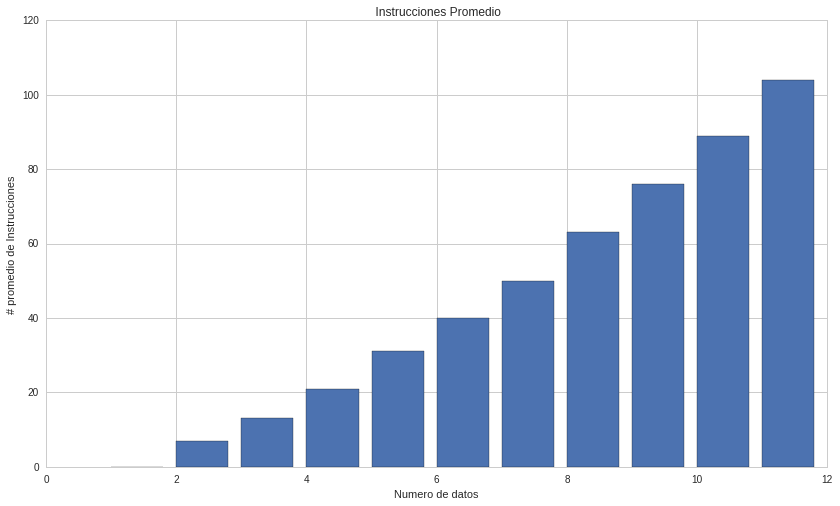

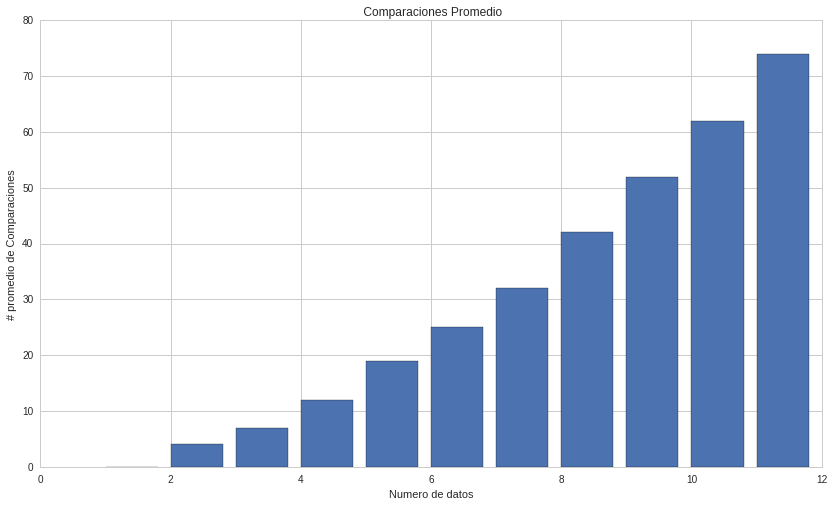

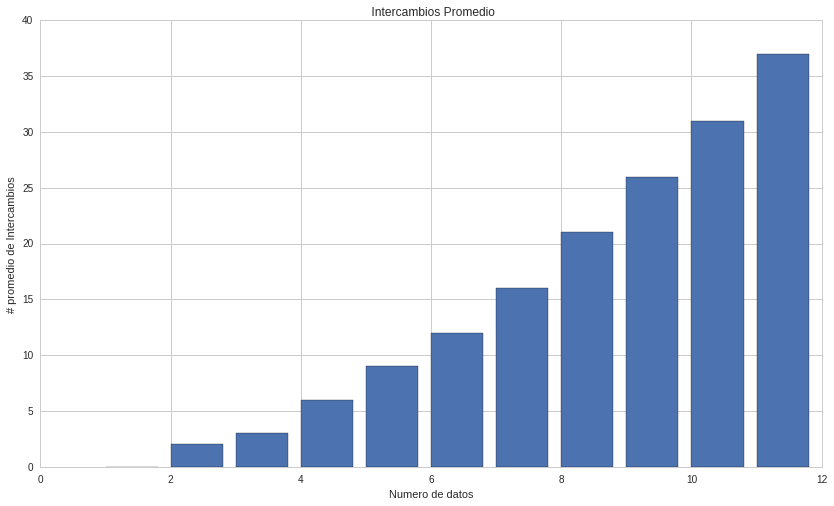

In [2]:
sizeArray = range ( 1, n ) 
casoPromedio = listInstructionGlobal

fig = plt.figure()
axes = fig.add_subplot( 111 )
plt.bar( sizeArray, casoPromedio )
plt.ylabel('# promedio de Instrucciones' )
plt.xlabel('Numero de datos')
plt.title( " Instrucciones Promedio" )
plt.show()


casoPromedio = listComparisonGlobal

fig = plt.figure()
axes = fig.add_subplot( 111 )
plt.bar( sizeArray, casoPromedio )
plt.ylabel('# promedio de Comparaciones' )
plt.xlabel('Numero de datos')
plt.title( " Comparaciones Promedio" )
plt.show()

casoPromedio = listExchangeGlobal

fig = plt.figure()
axes = fig.add_subplot( 111 )
plt.bar( sizeArray, casoPromedio )
plt.ylabel('# promedio de Intercambios' )
plt.xlabel('Numero de datos')
plt.title( " Intercambios Promedio" )
plt.show()